# **| Handwritten Digit Recognition |**

### *Importing Basic Libraries*

In [22]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### *Load Dataset*
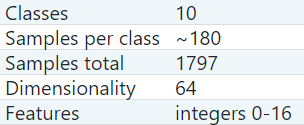

In [6]:
dataset = load_digits()

### *Summarize Dataset*

In [7]:
print(dataset.data)
print(dataset.target)

print(dataset.data.shape)
print(dataset.images.shape)

dataimageLength = len(dataset.images)
print(dataimageLength)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1797, 64)
(1797, 8, 8)
1797


### *Visualize the Dataset*

<Figure size 640x480 with 0 Axes>

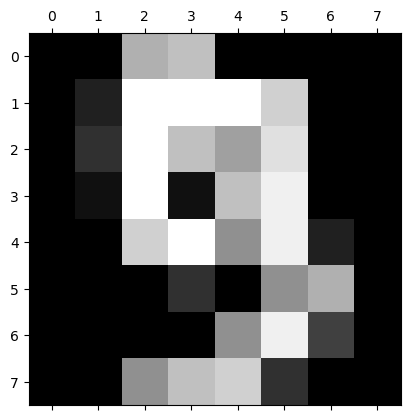

array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
       [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
       [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
       [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]])

In [9]:
n=9 #No. of Sample out of Samples total 1797

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(dataset.images[n])
plt.show()

dataset.images[n]

### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

### *Input - Pixel | Output - Class*

In [10]:
X = dataset.images.reshape((dataimageLength,-1))
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
Y = dataset.target
Y

array([0, 1, 2, ..., 8, 9, 8])

### *Splitting Dataset into Train & Test*

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(1347, 64)
(450, 64)


### *Training*

In [61]:
# Create a smv model
svm_model = svm.SVC(random_state=0)
svm_model.fit(X_train, y_train)

# Define the hyperparameter grid to search through
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search_svm.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [62]:
# Create a random forest model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)


# Define the hyperparameter grid to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_search_rf= GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)


# Fit the GridSearchCV object on the training data
grid_search_rf.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [67]:
# Create a KNN model
knn_model = KNeighborsClassifier(random_state=0)
knn_model.fit(X_train, y_train)


# Define the hyperparameter grid for tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create the GridSearchCV instance
grid_search_knn = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_knn.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [73]:
# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

# Define the hyperparameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV instance
grid_search_dt = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

### Get the best parameters and the best model

In [57]:
#  SVM Model
best_params_svm = grid_search_svm.best_params_
best_model_svm = grid_search_svm.best_estimator_
print("Best Parameters for SVM model:", best_params_svm)

Best Parameters for SVM model: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [58]:
# Random Forest Model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
print("Best Parameters:", best_params_rf)


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [75]:
# KNN Model
best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_

print("Best Parameters for KNN model:", grid_search_knn.best_params_)
# print("Best Accuracy: {0:.2f}%".format(grid_search_knn.best_score_ * 100))

Best Parameters for KNN model: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}


In [79]:
# Random Forest Model
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_
print("Best Parameters for Random Forest Model:", best_params_rf)


Best Parameters for Random Forest Model: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### *Predicting, what the digit is from Test Data*

[3]




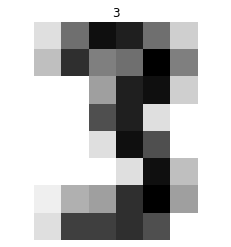

In [ ]:
n=13
result = model.predict(dataset.images[n].reshape((1,-1)))
plt.imshow(dataset.images[n], cmap=plt.cm.gray_r, interpolation='nearest')     
print(result)
print("\n")
plt.axis('off')
plt.title('%i' %result)
plt.show()

### *Prediction for Test Data*

In [63]:
svm_y_pred = svm_model.predict(X_test)
best_svm_y_pred = best_model.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [64]:
# Predict using random forest model
rf_y_pred = rf_model.predict(X_test)
best_rf_y_pred = best_model_rf.predict(X_test)

In [69]:
# Predict using KNN model
knn_y_pred = knn_model.predict(X_test)
best_knn_y_pred = best_model_knn.predict(X_test)

C:\Users\91914\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [80]:
# Predict using Decision Tree model
dt_y_pred = dt_model.predict(X_test)
best_dt_y_pred = best_model_dt.predict(X_test)

### *Evaluate Model - Accuracy Score*

In [39]:
# Calculate accuracy of the svm model
from sklearn.metrics import accuracy_score
print("Accuracy of the SVM Model: {0}%".format(accuracy_score(y_test, svm_y_pred)*100))
print("Accuracy of the Best SVM Model: {0}%".format(accuracy_score(y_test, best_svm_y_pred)*100))


Accuracy of the SVM Model: 97.11111111111111%
Accuracy of the Best SVM Model: 99.11111111111111%


In [65]:
# Calculate accuracy of the random forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred) * 100
print("Accuracy of the Random Forest Model: {0}%".format(rf_accuracy))
print("Accuracy of the Best Random Forest Model: {:.2f}%".format(accuracy_score(y_test, best_rf_y_pred) * 100))

Accuracy of the Random Forest Model: 97.55555555555556%
Accuracy of the Best Model: 98.00%


In [70]:
# Calculate accuracy of the KNN model
knn_accuracy = accuracy_score(y_test, knn_y_pred) * 100
print("Accuracy of the K-Nearest Neighbors Model: {0}%".format(knn_accuracy))
print("Accuracy of the K-Nearest Neighbors Model: {:.2f}%".format(accuracy_score(y_test, best_knn_y_pred) * 100))

Accuracy of the K-Nearest Neighbors Model: 98.0%
Accuracy of the K-Nearest Neighbors Model: 98.89%


In [81]:
# Calculate accuracy of the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_y_pred) * 100
print("Accuracy of the Decision Tree Model: {0}%".format(dt_accuracy))
print("Accuracy of the Best Decision Tree Model: {:.2f}%".format(accuracy_score(y_test, best_dt_y_pred) * 100))

Accuracy of the Decision Tree Model: 83.77777777777777%
Accuracy of the Best Decision Tree Model: 82.22%


### *Model Comparison without hyperparameter tuning*

In [30]:
# Compare the accuracy of all models without hypertuning
print("Accuracy of the SVM Model: {0}%".format(accuracy_score(y_test, y_pred) * 100))
print("Accuracy of the Random Forest Model: {0}%".format(rf_accuracy))
print("Accuracy of the K-Nearest Neighbors Model: {0}%".format(knn_accuracy))
print("Accuracy of the Decision Tree Model: {0}%".format(dt_accuracy))

Accuracy of the SVM Model: 97.11111111111111%
Accuracy of the Random Forest Model: 97.55555555555556%
Accuracy of the K-Nearest Neighbors Model: 98.0%
Accuracy of the Decision Tree Model: 83.77777777777777%


### *Model Comparison with hyperparameter tuning*

In [71]:
# Compare the accuracy of all models with hypertuning
print("Accuracy of the Best SVM Model: {0}%".format(accuracy_score(y_test, best_svm_y_pred)*100))
print("Accuracy of the Best Random Forest Model: {:.2f}%".format(accuracy_score(y_test, best_rf_y_pred) * 100))
print("Accuracy of the Best K-Nearest Neighbors Model: {:.2f}%".format(accuracy_score(y_test, best_knn_y_pred) * 100))


Accuracy of the Best SVM Model: 99.11111111111111%
Accuracy of the Best Random Forest Model: 98.00%
Accuracy of the Best K-Nearest Neighbors Model: 98.89%


### *Play with the Different Method*

In [ ]:
from sklearn import svm
model1 = svm.SVC(kernel='linear')
model2 = svm.SVC(kernel='rbf')
model3 = svm.SVC(gamma=0.001)
model4 = svm.SVC(gamma=0.001,C=0.1)

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)

y_predModel1 = model1.predict(X_test)
y_predModel2 = model2.predict(X_test)
y_predModel3 = model3.predict(X_test)
y_predModel4 = model4.predict(X_test)

print("Accuracy of the Model 1: {0}%".format(accuracy_score(y_test, y_predModel1)*100))
print("Accuracy of the Model 2: {0}%".format(accuracy_score(y_test, y_predModel2)*100))
print("Accuracy of the Model 3: {0}%".format(accuracy_score(y_test, y_predModel3)*100))
print("Accuracy of the Model 4: {0}%".format(accuracy_score(y_test, y_predModel4)*100))

Accuracy of the Model 1: 97.11111111111111%
Accuracy of the Model 2: 99.11111111111111%
Accuracy of the Model 3: 99.55555555555556%
Accuracy of the Model 4: 96.66666666666667%
